John Ferrara (Homework 3 - DATA 605)
-------------------------------

## Problem 1 - Transportation Safety

### Scenario:
You are a data analyst at a transportation safety organization. Your task is to analyze the relationship between the speed of cars and their stopping distance using the built-in R dataset `cars`. This analysis will help in understanding how speed affects the stopping distance, which is crucial for improving road safety regulations.

### Task:
Using the `cars` dataset in R, perform the following steps:

#### 1. Data Visualization:
- Create a scatter plot of stopping distance (`dist`) as a function of speed (`speed`).
- Add a regression line to the plot to visually assess the relationship.

50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes
None
--
           speed        dist
count  50.000000   50.000000
mean   15.400000   42.980000
std     5.287644   25.769377
min     4.000000    2.000000
25%    12.000000   26.000000
50%    15.000000   36.000000
75%    19.000000   56.000000
max    25.000000  120.000000
--


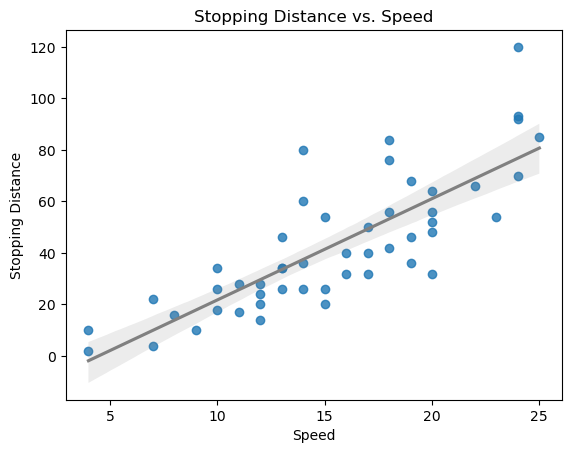

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as stats

import seaborn as sns

## Working in python so pulling in the r dataset a different way. 
cars = sm.datasets.get_rdataset("cars").data
print(len(cars)) #50 rows of data, 
print(cars.info()) # No nulls in the df
print('--')
print(cars.describe())
print('--')
# print(cars.head())
# print('---')
sns.regplot(x='speed', y='dist', data=cars, line_kws={"color": "grey"})
plt.title("Stopping Distance vs. Speed")
plt.xlabel("Speed")
plt.ylabel("Stopping Distance")
plt.show()

<p style="page-break-after:always;"></p>

#### 2. Build a Linear Model:
- Construct a simple linear regression model where stopping distance (`dist`) is the dependent variable and speed (`speed`) is the independent variable.
- Summarize the model to evaluate its coefficients, R-squared value, and p-value.

In [2]:
## Speed is independent, distance is dependent
x = cars['speed']
y = cars['dist']
model = sm.OLS(y, x).fit()
print(model.summary()) 
## Results:
## speed coef = 2.9091 , R^2 = 0.894, p-val =0.000

                                 OLS Regression Results                                
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Mon, 05 May 2025   Prob (F-statistic):                    9.23e-26
Time:                        13:45:10   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### 3. Model Quality Evaluation:
- Calculate and interpret the R-squared value to assess the proportion of variance in stopping distance explained by speed.
- Perform a residual analysis to check the assumptions of the linear regression model, including linearity, homoscedasticity, independence, and normality of residuals.

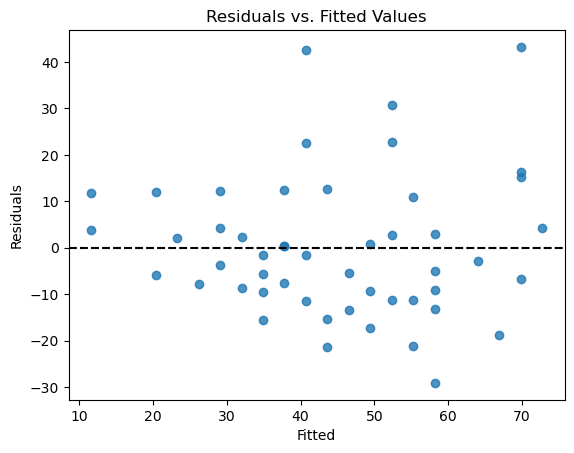

In [3]:
## The adjusted r^2 for the model is 0.894, which means the speed of the car is responsible for 89.4% of the variance in the stoping speed.
cars_resid = cars.copy()
cars_resid['fitted'] = model.fittedvalues
cars_resid['residuals'] = model.resid
sns.residplot(x='fitted', y='residuals', data=cars_resid, line_kws={'color': 'grey'})
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.show()

## Generally speaking, the residuals do seem to be randomly scattered around 0.
## However there are some outliers that seem to be further out as the fitted values increase.
## Overall, linearity checks out and homoscedasticity is mostly ok, those previously mentioned outliers are not ideal. 
## There are not outright patterns, so model seems valid. 

#### 4. Residual Analysis:
- Plot the residuals versus fitted values to check for any patterns.
- Create a Q-Q plot of the residuals to assess normality.
- Perform a Shapiro-Wilk test for normality of residuals.
- Plot a histogram of residuals to further check for normality.

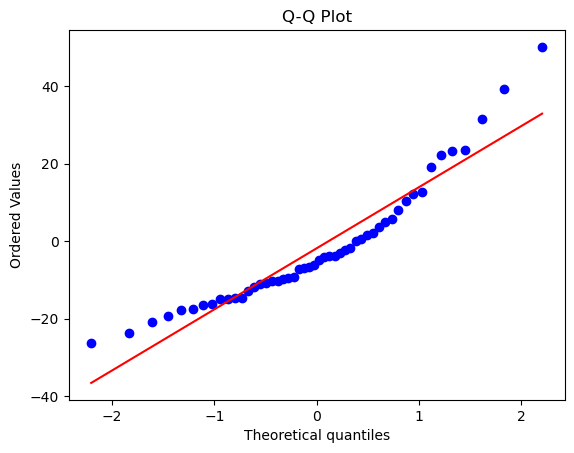

Shapiro-Wilk Test pvalue is: 0.0008982633497550559
 The pvalue is less than 0.05, which means that the null hypothesis can be rejected. In other words, the residuals are not be norm. dist.


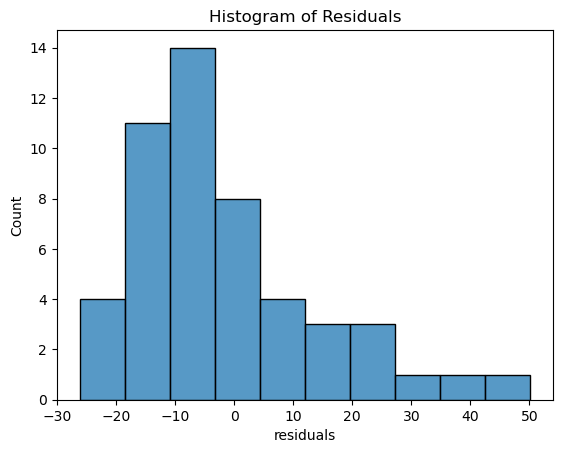

In [4]:
## Further checks of the model with additional plots
#QQ
stats.probplot(cars_resid['residuals'], plot=plt)
plt.title("Q-Q Plot")
plt.show()
#Shapiro
shapiro = stats.shapiro(cars_resid['residuals'])
print(f"Shapiro-Wilk Test pvalue is: {shapiro.pvalue}")
print(""" The pvalue is less than 0.05, which means that the null hypothesis can be rejected. In other words, the residuals are not be norm. dist.""")
## Resid Histogram
sns.histplot(cars_resid['residuals'], bins=10)
plt.title("Histogram of Residuals")
plt.show()

#### 5. Conclusion:
- Based on the model summary and residual analysis, determine whether the linear model is appropriate for this data.
- Discuss any potential violations of model assumptions and suggest improvements if necessary.

In [5]:
### Conclusion:
# Overall the r^2 is high for this model, around 0.89. This, as mentioned, indicated that about 90% of the variance in stopping distance is explained by
# the speed of the car. However this model is not perfect, and has some flaws. Firstly, the residuals are not normally distirbuted which was confirmed 
# with the qq plot and the Shapiro test. THe residal histogram further proves this skewness. A plus of the model is that it passes test for linearity
# with the residuasls randomly scattered aroudn 0 in the initial plot. However, the same chart lends itself to having some homoscedasticity, 
#which is problematic. In short, the model is good, but can use some improvAements to avoid these pitfalls.

## Problem 2 - Health Policy Analyst

As a health policy analyst for an international organization, you are tasked with analyzing data from the World Health Organization (WHO) to inform global health policies. The dataset provided (`who.csv`) contains crucial health indicators for various countries from the year 2008. The variables include:

- **Country**: Name of the country
- **LifeExp**: Average life expectancy for the country in years
- **InfantSurvival**: Proportion of those surviving to one year or more
- **Under5Survival**: Proportion of those surviving to five years or more
- **TBFree**: Proportion of the population without TB
- **PropMD**: Proportion of the population who are MDs
- **PropRN**: Proportion of the population who are RNs
- **PersExp**: Mean personal expenditures on healthcare in US dollars at average exchange rate
- **GovtExp**: Mean government expenditures per capita on healthcare, US dollars at average exchange rate
- **TotExp**: Sum of personal and government expenditures

Your analysis will directly influence recommendations for improving global life expectancy and the allocation of healthcare resources.

In [6]:
## Reading in the provided data before gettign states 
who_df = pd.read_csv('who.csv', encoding='latin-1')
print(who_df.head())
print(len(cars)) #50 rows of data, 
print(who_df.info()) # No nulls in the df
print('--')
print(who_df.describe())
print('--')
# print(who_df.head())
# print('---')

       Country  LifeExp  InfantSurvival  Under5Survival   TBFree    PropMD  \
0  Afghanistan       42           0.835           0.743  0.99769  0.000229   
1      Albania       71           0.985           0.983  0.99974  0.001143   
2      Algeria       71           0.967           0.962  0.99944  0.001060   
3      Andorra       82           0.997           0.996  0.99983  0.003297   
4       Angola       41           0.846           0.740  0.99656  0.000070   

     PropRN  PersExp  GovtExp  Unnamed: 9  TotExp  LifeExp.1  
0  0.000572       20       92         NaN     112         42  
1  0.004614      169     3128         NaN    3297         71  
2  0.002091      108     5184         NaN    5292         71  
3  0.003500     2589   169725         NaN  172314         82  
4  0.001146       36     1620         NaN    1656         41  
50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  


### Question 1: Initial Assessment of Healthcare Expenditures and Life Expectancy

**Task**: Create a scatterplot of `LifeExp` vs. `TotExp` to visualize the relationship between healthcare expenditures and life expectancy across countries. Then, run a simple linear regression with `LifeExp` as the dependent variable and `TotExp` as the independent variable (without transforming the variables).

- Provide and interpret the F-statistic, R-squared value, standard error, and p-values.
- Discuss whether the assumptions of simple linear regression (linearity, independence, homoscedasticity, and normality of residuals) are met in this analysis.

**Discussion**: Consider the implications of your findings for health policy. Are higher healthcare expenditures generally associated with longer life expectancy? What do the assumptions of the regression model suggest about the reliability of this relationship?

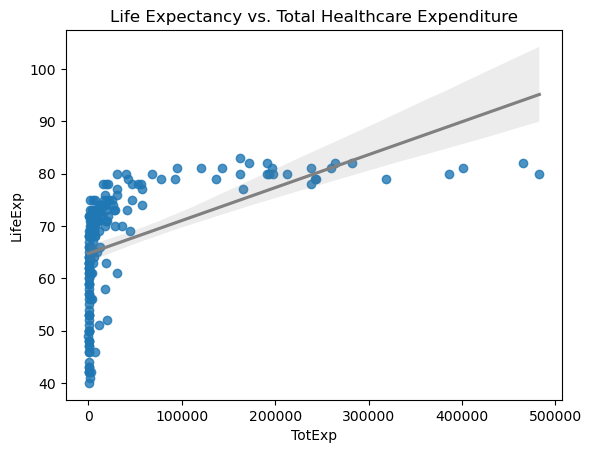

---
                                 OLS Regression Results                                
Dep. Variable:                LifeExp   R-squared (uncentered):                   0.248
Model:                            OLS   Adj. R-squared (uncentered):              0.244
Method:                 Least Squares   F-statistic:                              62.48
Date:                Mon, 05 May 2025   Prob (F-statistic):                    2.17e-13
Time:                        13:45:12   Log-Likelihood:                         -1044.8
No. Observations:                 190   AIC:                                      2092.
Df Residuals:                     189   BIC:                                      2095.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [7]:
# Scatter plot Life Exp and Tot Exp
sns.regplot(x='TotExp', y='LifeExp', data=who_df, line_kws={"color": "grey"})
plt.title('Life Expectancy vs. Total Healthcare Expenditure')
plt.show()

# OLS reg
x = who_df['TotExp']
y = who_df['LifeExp']           
model = sm.OLS(y, x).fit()
print('---')
print(model.summary())
## The f-stat, r^2, std. error, and p value is: 62.48, 0.244, 4.45e-05, and 0.000, resepctively.
## The p-vzalue indicates a statistically significanty relationship, with the r^2 outlining the about 25% of the vairance in Life expectancy is 
## explained by total healthcare expenditure. This is not super high, so it isnt the main factor in life expectancy. Looking at the data, there seems
## to be point of diminishing returns for increased total expenditures.

### Question 2: Transforming Variables for a Better Fit

**Task**: Recognizing potential non-linear relationships, transform the variables as follows:

- Raise life expectancy to the 4.6 power (`LifeExp^4.6`).m
- Raise total expenditures to the 0.06 power (`TotExp^0.06`), which is nearly a logarithmic transformation.

Create a new scatterplot with the transformed variables and re-run the simple linear regression model.

- Provide and interpret the F-statistic, R-squared value, standard error, and p-values for the transformed model.
- Compare this model to the original model (from Question 1). Which model provides a better fit, and why?

**Discussion**: How do the transformations impact the interpretation of the relationship between healthcare spending and life expectancy? Why might the transformed model be more appropriate for policy recommendations?

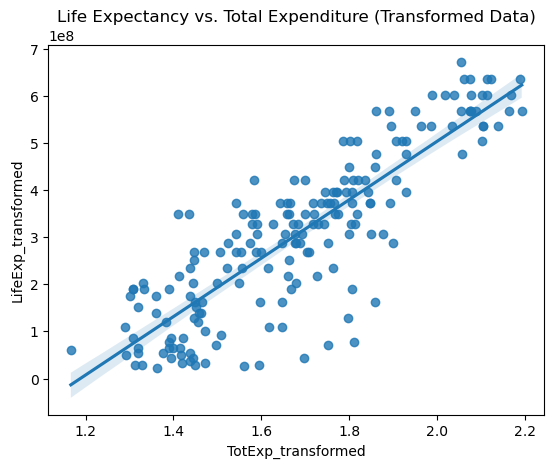

                                 OLS Regression Results                                 
Dep. Variable:     LifeExp_transformed   R-squared (uncentered):                   0.850
Model:                             OLS   Adj. R-squared (uncentered):              0.849
Method:                  Least Squares   F-statistic:                              1068.
Date:                 Mon, 05 May 2025   Prob (F-statistic):                    1.09e-79
Time:                         13:45:12   Log-Likelihood:                         -3829.3
No. Observations:                  190   AIC:                                      7661.
Df Residuals:                      189   BIC:                                      7664.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [8]:
who_df['LifeExp_transformed'] = who_df['LifeExp'] ** 4.6
who_df['TotExp_transformed'] = who_df['TotExp'] ** 0.06
sns.regplot(x='TotExp_transformed', y='LifeExp_transformed', data=who_df)
plt.title('Life Expectancy vs. Total Expenditure (Transformed Data)')
plt.show()

## Notes: This scatter plot with the transformed data seems to be much more linear, 
## and the regression line fits the data much batter than just plotting the raw data.

# Linear regression on transformed variables
x_trans =who_df['TotExp_transformed']
y_trans = who_df['LifeExp_transformed']
model_trans = sm.OLS(y_trans, x_trans).fit()
print(model_trans.summary())
## The f-stat, r^2, std. error, and p value is: 1068, 0.849, 5.86e+06, and 0.000, respectively.

## This second model is a much better fit than the first, the r^2 increassed from aroudn 25% to 85%, similarly the f-stat increased to over 1000.
## These are both substanital increases. The p-values for both models are statisitcally significant. The transformed model fits much better than the 
## initial raw data model. This better forming model implies a non-linear relationship between the two variables, which is captured better by these
## transformation. The transformed model, more appropriately capturing the relationship would be ideal for policy recommendations.

### Question 3: Forecasting Life Expectancy Based on Transformed Expenditures

**Task**: Using the results from the transformed model in Question 2, forecast the life expectancy for countries with the following transformed total expenditures (`TotExp^0.06`):

- When `TotExp^0.06 = 1.5`
- When `TotExp^0.06 = 2.5`

**Discussion**: Discuss the implications of these forecasts for countries with different levels of healthcare spending. What do these predictions suggest about the potential impact of increasing healthcare expenditures on life expectancy?

In [9]:
#TotExp^0.06 = 1.5
print(f"The raw Expenditure value is : {1.5 ** (1 / 0.06)}") 
y_trans_pred = model_trans.predict(1.5)
## Converting back to raw values
y_pred = y_trans_pred ** (1 / 4.6)
print(f"The initial transformed value is {y_trans_pred}, while after converting back to raw values the predicted value is {y_pred}.")
#TotExp^0.06 = 2.5
print(f"The raw Expenditure value is : {2.5 ** (1 / 0.06)}") 
y_trans_pred = model_trans.predict(2.5)
## Converting back to raw values
y_pred = y_trans_pred ** (1 / 4.6)
print(f"The initial transformed value is {y_trans_pred}, while after converting back to raw values the predicted value is {y_pred}.")

## Overall, the transformed expenditure is 1.5, the raw spending is about $860 with the predicted life expectancy is around 69 years.
## When the transformed value is 2.5, the raw spending jumps to about $4.29 million with the predicted life expectancy going up ~77 years.
## Thus increasing healthcare spending does lead to higher life expectancy, but there is a diminishing return after a certain point. A non-linear 
## relationship.

The raw Expenditure value is : 860.7049835942188
The initial transformed value is [2.87125002e+08], while after converting back to raw values the predicted value is [68.97807807].
The raw Expenditure value is : 4288777.12534786
The initial transformed value is [4.7854167e+08], while after converting back to raw values the predicted value is [77.07953367].


### Question 4: Interaction Effects in Multiple Regression

**Task:** Build a multiple regression model to investigate the combined effect of the proportion of MDs and total healthcare expenditures on life expectancy. Specifically, use the model:

$$
\text{LifeExp} = b_0 + b_1 \times \text{PropMD} + b_2 \times \text{TotExp} + b_3 \times (\text{PropMD} \times \text{TotExp})
$$

- Interpret the F-statistic, R-squared value, standard error, and p-values.
- Evaluate the interaction term ($\text{PropMD} * \text{TotExp}$). What does this interaction tell us about the relationship between the number of MDs, healthcare spending, and life expectancy?

**Discussion:** How does the presence of more MDs amplify or diminish the effect of healthcare expenditures on life expectancy? What policy recommendations can be drawn from this analysis?


In [10]:
who_df['PropMD_TotExp'] = who_df['PropMD'] * who_df['TotExp']
x_interact = who_df[['PropMD', 'TotExp', 'PropMD_TotExp']]
y = who_df['LifeExp']
model_interact = sm.OLS(y, x_interact).fit()
print(model_interact.summary())

## The p-values of this model outlines that each predictor is statistically significant. Looking a the coefficients, the strongest relationship is the 
## combined effect of the Porportion of MDs and Expenditure on Life expectency. The predictor has a coefficient of -0.0487, which means as the number of 
## MDs increases the positive impacts of expenditure on life expectency actually goes down slightly. The r^2 is lower than the second model, but still 
## better than the first. Overall, this shows that increasing both MDs and spending doesnt necessarily boost life expectancy.

                                 OLS Regression Results                                
Dep. Variable:                LifeExp   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.434
Method:                 Least Squares   F-statistic:                              49.63
Date:                Mon, 05 May 2025   Prob (F-statistic):                    1.21e-23
Time:                        13:45:13   Log-Likelihood:                         -1016.3
No. Observations:                 190   AIC:                                      2039.
Df Residuals:                     187   BIC:                                      2048.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Question 5: Forecasting Life Expectancy with Interaction Terms

**Task:** Using the multiple regression model from Question 4, forecast the life expectancy for a country where:

- The proportion of MDs is 0.03 ($\text{PropMD} = 0.03$).
- The total healthcare expenditure is 14 ($\text{TotExp} = 14$).

**Discussion:** Does this forecast seem realistic? Why or why not? Consider both the potential strengths and limitations of using this model for forecasting in real-world policy settings.


In [11]:
## Making a prediction with model from Q4
predict_data = pd.DataFrame({
    'PropMD': [0.03],
    'TotExp': [14],
    'PropMD_TotExp': [0.03*14]
})
predicted = model_interact.predict(predict_data)
print(f"Predicted Life Expectancy is {round(predicted[0],2)}")

## The prediction output here is 350 years, which is not reasonable or realistic. This means that the model, while "accurate" is not easily scalable. 
## There also could be other issues within the data like multicolinearity, etc. 
## These considerations have obvious impacts for real world policy decsions. The take away is even if the stats look good, 
## it doesn't always mean the predictions will make sense in practice

Predicted Life Expectancy is 350.11


## Problem 3 - Retail Company Analyst

### Question 1 – Inventory Cost

**Scenario:**  
A retail company is planning its inventory strategy for the upcoming year. They expect to sell 110 units of a high-demand product. The storage cost is \\$3.75 per unit per year, and there is a fixed ordering cost of $8.25 per order. The company wants to minimize its total inventory cost.

**Task:**  
Using calculus, determine the optimal lot size (the number of units to order each time) and the number of orders the company should place per year to minimize total inventory costs. Assume that the total cost function is given by:

$$
C(Q) = \frac{D}{Q} \cdot S + \frac{Q}{2} \cdot H
$$

**Where:**

- \( D \) is the total demand (110 units)  
- \( Q \) is the order quantity  
- \( S \) is the fixed ordering cost per order (\$8.25)  
- \( H \) is the holding cost per unit per year (\$3.75)  


In [12]:
## Using sympy for the calc/ algebra math
import sympy as sp

Q = sp.Symbol('Q', positive=True)
D = 110
S = 8.25
H = 3.75
C = (D / Q) * S + (Q / 2) * H

c_deriv = sp.diff(C, Q)
print("Derivative formula of C(Q) is: ",c_deriv)

## Solving the derivative formulat for 0, because we want the minimum. 
q_opt = sp.solve(c_deriv, Q)[0]
print("Total number of orders: ", q_opt)
num_orders = D / q_opt
print("The number of order made per year is :",round(num_orders))

# Min Cost calc
cost_min = C.subs(Q, q_opt)
print("The minum inventory cost for this: $",round(cost_min,2))


Derivative formula of C(Q) is:  1.875 - 907.5/Q**2
Total number of orders:  22.0000000000000
The number of order made per year is : 5
The minum inventory cost for this: $ 82.50


### Question 2: Revenue Maximization

**Scenario:**  
A company is running an online advertising campaign. The effectiveness of the campaign, in terms of revenue generated per day, is modeled by the function:

$$
R(t) = -3150t^4 - 220t + 6530
$$

Where:

- \( R(t) \) represents the revenue in dollars after \( t \) days of the campaign.

**Task:**  
Determine the time \( t \) at which the revenue is maximized by finding the critical points of the revenue function and determining which point provides the maximum value. What is the maximum revenue the company can expect from this campaign?



In [13]:
t = sp.Symbol('t')
R = -3150*t**4 - 220*t + 6530

# Getting derivative for rate of change for rev.
r_deriv = sp.diff(R, t)
print("First derivative:", r_deriv)

#Solving the deriv. for for the min/ max, when = 0 / not changing
sol_derv = sp.solve(r_deriv, t)
print("List of vals:")
print(sol_derv)
#Values as numbers
print([p.evalf() for p in sol_derv])

## Second derive to test the curve
r_deriv2 = sp.diff(r_deriv, t)
print(r_deriv2)

for p in sol_derv:
    ## Initially got imaginary numbers, only want real
    if p.is_real:
        second_deriv = r_deriv2.subs(t,p)
        print('--')
        print("Second Derivative", second_deriv)
        revenue = R.subs(t, p.evalf())
        print(f"For when t = {round(p.evalf(),2)}, Revenue = {round(revenue,2)}")

### My work shows that the campaign starts off loosing revenue. That the maximum value for revenue in this function is $6,572 at negative 0.25 days.
## This doesnt seem practical, and would be indicative of the campaign loosing money from the start. Thus yielding no benefit. 

First derivative: -12600*t**3 - 220
List of vals:
[-161700**(1/3)/210, 161700**(1/3)/420 - 3**(5/6)*53900**(1/3)*I/420, 161700**(1/3)/420 + 3**(5/6)*53900**(1/3)*I/420]
[-0.259428317192278, 0.129714158596139 - 0.22467151314956*I, 0.129714158596139 + 0.22467151314956*I]
-37800*t**2
--
Second Derivative -60*76230**(1/3)
For when t = -0.26, Revenue = 6572.81


\newpage

### Question 3: Demand Area Under Curve

**Scenario:**  
A company sells a product at a price that decreases over time according to the linear demand function:

$$
P(x) = 2x - 9.3
$$

Where:

- \( P(x) \) is the price in dollars, and \( x \) is the quantity sold.

**Task:**  
The company is interested in calculating the total revenue generated by this product between two quantity levels, \( x_1 = 2 \) and \( x_2 = 5 \), where the price still generates sales. Compute the area under the demand curve between these two points, representing the total revenue generated over this range.

In [14]:
x = sp.Symbol('x')
P = 2*x - 9.3

revenue_area = sp.integrate(P, (x,2 , 5))
print("Total Revenue:", revenue_area.evalf())

## I get neg value, so we need to look for "break even" and use that with max value we care about (5)

#Ares for  x=2 to x=5
x_be = sp.solve(P,x)
print("Where the company breaks even: ", x_be) 

# now moving to use break even point instead of the x=2 input because break even is where revnue would start. 
revenue_area = sp.integrate(P, (x,x_be , 5))
print("Total Revenue:", revenue_area.evalf())

## For xvals from  x = 2 to x = 5,  revenue is $-6.9. THis means part of that interval has negative prices with the company loosing money overall.
## To dig in deeper we solved the equation for 0 in order to fine the break even point, which was x = 4.65 items sold. 
## So roughly 5 items are needed to be sold to break even from a revenue stand point.
## Tehcnically, if you could sell less than one whole product, the area from the break even value (x=4.65) to x =5, 
## would yeild $0.1225 in meaningful revenue.

Total Revenue: -6.90000000000000
Where the company breaks even:  [4.65000000000000]
Total Revenue: 0.122500000000002


### Question 4 – Profit Optimization

**Scenario:**  
A beauty supply store sells flat irons, and the profit function associated with selling \( x \) flat irons is given by:

$$
\Pi(x) = x \ln(9x) - \frac{x^6}{6}
$$

Where:  
- ( Pi(x) \) is the profit in dollars.

**Task:**  
Use calculus to find the value of \( x \) that maximizes profit.  
Calculate the maximum profit that can be achieved and determine if this optimal sales level is feasible given market conditions.


In [15]:
x = sp.Symbol('x', positive=True)
pi = x * sp.ln(9 * x) - (x**6) / 6
first_deriv  = sp.diff(pi, x)
print(first_deriv)

## need to use different function to solve, need numeric
solve_deriv = sp.nsolve(first_deriv, x,1)
print("Potential Max: ",solve_deriv)

## Confirmation of max with second deriv
second_deriv = sp.diff(first_deriv, x)
print(second_deriv)
concavity = second_deriv.subs(x, solve_deriv).evalf()
print("Second derivative at x =", solve_deriv, "is", concavity) 
# the 2nd deriv is neg so it is a max from first derivative

# plugging in  the finding
max_profit = pi.subs(x, solve_deriv).evalf()
print("Maximum profit:", max_profit)

## THe maximum profit that could be achieved is $2.39 when the store sells 1.29 hair irons. THis is technically the right answer, you cant sell
## half an item, therefore its more feasible that with this function 1 hair iron is the quantity for max profit, if we round to nearest whole number. 

-x**5 + log(9*x) + 1
Potential Max:  1.28064096028429
-5*x**4 + 1/x
Second derivative at x = 1.28064096028429 is -12.6678178380146
Maximum profit: 2.39542320718277


### Question 5: Spending Behavior

**Scenario:**  
A market research firm is analyzing the spending behavior of customers in a retail store. The spending behavior is modeled by the probability density function:

$$
f(x) = \frac{1}{6x}
$$

Where $x$ represents spending in dollars.

**Task:**  
Determine whether this function is a valid probability density function over the interval $[1, e^6]$.  
If it is, calculate the probability that a customer spends between \\$1 and $e^6$.


In [16]:
x = sp.Symbol('x', positive=True)
f = 1 / (6 * x)

# The given interval 
a = 1
b = sp.exp(6)

# Checking that the total probability is 1, aka if its valid
total_prob = sp.integrate(f, (x, a, b))
print(total_prob)

# Calculate probability a customer spends between $1 and e^6
probability = total_prob.evalf()

# The PDF is valid because it totals 1, meaning 100%, thus valid for a probability function curve area. 
print(f"The probability of a customer spending between these amounts is {round(probability*100)} %")


1
The probability of a customer spending between these amounts is 100 %


### Question 6: Market Share Estimation

**Scenario:**  
An electronics company is analyzing its market share over a certain period. The rate of market penetration is given by:

$$
\frac{dN}{dt} = \frac{500}{t^4 + 10}
$$

Where \( N(t) \) is the cumulative market share at time \( t \).

**Task:**  
Integrate this function to find the cumulative market share \( N(t) \) after \( t \) days, given that the initial market share is:

$$
N(1) = 6530
$$

What will the market share be after 10 days?


In [17]:
t = sp.Symbol('t', positive=True)
dN_dt = 500 / (t**4 + 10)

# Getting the integral formula
N_t = sp.integrate(dN_dt, t)
# print(N_t)

# Given N(t), for ten days we need 10, so running that
N_10 = sp.integrate(dN_dt, (t, 1, 10))
# print(N_10)

#we're given 
N_1_g = 6530

## Getting the cumulative market share at 10th date
market_share = N_1_g + N_10.evalf()
print('--')
print("The cumulative market share after 10 days is : ",round(market_share,2))


--
The cumulative market share after 10 days is :  6579.54


## Problem 4 - Business Optimization

As a data scientist at a consultancy firm, you are tasked with optimizing various business functions to improve efficiency and profitability. Taylor Series expansions are a powerful tool to approximate complex functions, allowing for simpler calculations and more straightforward decision-making. This week, you will work on Taylor Series expansions of popular functions commonly encountered in business scenarios.

### Question 1: Revenue and Cost

#### **Scenario:**
A company’s revenue from a product can be approximated by the function  
$$ R(x) = e^x, $$  
where \( x \) is the number of units sold. The cost of production is given by  
$$ C(x) = \ln(1 + x). $$  
The company wants to maximize its profit, defined as  
$$ \Pi(x) = R(x) - C(x). $$

---

#### **Task:**

1. **Approximate the Revenue Function:**  
   Use the Taylor Series expansion around \( x = 0 \) (Maclaurin series) to approximate the revenue function  
   $$  R(x) = e^x $$
   up to the second degree.  
   Explain why this approximation might be useful in a business context.

2. **Approximate the Cost Function:**  
   Similarly, approximate the cost function  
   $$ C(x) = \ln(1 + x)   $$
   using its Maclaurin series expansion up to the second degree.  
   Discuss the implications of this approximation for decision-making in production.

3. **Linear vs. Nonlinear Optimization:**  
   Using the Taylor Series expansions, approximate the profit function  
   $$ \Pi(x)   $$
   Compare the optimization results when using the linear approximations versus the original nonlinear functions.  
   What are the differences, and when might it be more appropriate to use the approximation?

---

#### **Submission:**
Provide your solutions using R-Markdown. Include the Taylor Series expansions, the approximated functions, and a discussion of the implications of using these approximations for business decision-making.


Task 1 - Approx. Rev Function
x**2/2 + x + 1
Task 2 - Est. Cost function
-x**2/2 + x
Task 3 - Profit FUnction Approx  & Charting Linear vs NonLinear
x**2 + 1


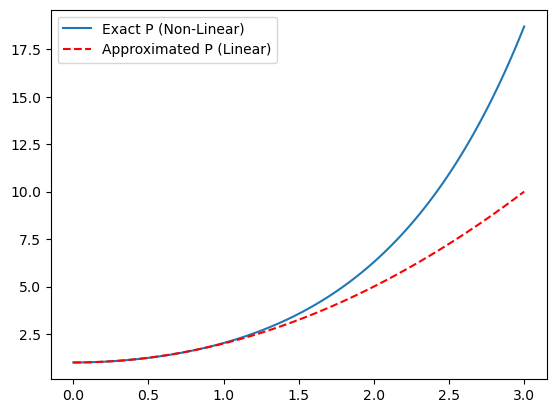

In [18]:
## NBTE: I know this question said in rmd format, but i already started in python, \
## so just continuing with it as the class generally allows both languages.

## Task1 - Est. Rev Function
# Defining the symbols and the relevant functions
x = sp.Symbol('x')
R = sp.exp(x)
C = sp.ln(1+x)
P = R - C
#Approximating r with maclaurin 
R_approx = R.series(x, 0, 3).removeO() #3 for non inclusive second degree lim & removeO for eventual plotting
print("Task 1 - Approx. Rev Function")
print(R_approx)
## Discussion - In a business context being able to quickly estimate the approximate revenue is critical for efficient and quick decisions. 
## Taking an exponential function and turning it into a simple polynomial-type equation allows for fast estimations for guiding the business.
## Particulatarly for this, because the approximation turns out to be more accurate earlier on ( with lower sales) it would be super helpf for risk
## centered calculations for low sales. This is would be helpful to simplify things when trying to forecast revenue growth.

## Task 2 - Est. Cost function
C_approx = C.series(x, 0, 3).removeO()#3 for non inclusive second degree lim & removeO for eventual plotting
print("Task 2 - Est. Cost function")
print(C_approx)
## Discussion - THe approximatrions, as mentioned in task 1's discussion, is good for lower x values and for quick costr esimtations. THis could come 
## in handy for budgeting, or situations where only limited quantities are sold.
## Again, the accuracy drops at higher x values, so while this is helpful early on more precise methods would be needed for larger decisions.

# Task 3 - Profit FUnction Approx & Charting Linear vs NonLinear
p_approx = R_approx - C_approx
print("Task 3 - Profit FUnction Approx  & Charting Linear vs NonLinear")
print(p_approx)

## Comparing actual to linear Aprrox.
x_values = np.linspace(0, 3, 100)
p_exact_values = [P.subs(x, v).evalf() for v in x_values]
p_approx_values = [ p_approx.subs(x, v).evalf() for v in x_values]

plt.plot(x_values, p_exact_values, label="Exact P (Non-Linear)")
plt.plot(x_values, p_approx_values, label="Approximated P (Linear)",color='red', linestyle='--')
plt.legend()
plt.show()

## Discussion - Looking at the plot one can see that accuracy for the approximation decreases as the numbers get higher. THis is true for this case
## as it is a non linear equation that is being estimated. Therefore, for more important decisions the approximations should not be used and the
## precise actual values should be used. Lasty, as discussed, for small x values the approximation performs well.


### Question 2: Financial Modeling

**Scenario:**  
A financial analyst is modeling the risk associated with a new investment. The risk is proportional to the square root of the invested amount, modeled as  
$$
f(x) = \sqrt{x},
$$  
where \( x \) is the amount invested. However, to simplify calculations, the analyst wants to use a Taylor Series expansion to approximate this function for small investments.

---

### Task:

1. **Maclaurin Series Expansion:**  
   Derive the Taylor Series expansion of  
   $$
   f(x) = \sqrt{x}
   $$  
   around  
   $$
   x = 0
   $$  
   up to the second degree.

2. **Practical Application:**  
   Use the derived series to approximate the risk for small investment amounts (e.g., when \( x \) is small). Compare the approximated risk with the actual function values for small and moderate investments. Discuss when this approximation might be useful in financial modeling.

3. **Optimization Scenario:**  
   Suppose the goal is to minimize risk while maintaining a certain level of investment return. Using the Taylor Series approximation, suggest an optimal investment amount \( x \) that balances risk and return.

---

**Submission:**  
Present your results in R-Markdown or Python, including:
- The Taylor Series expansion
- Comparisons between the original and approximated functions
- Your recommendations based on the analysis


sqrt(x)
Task 1 - Taylor Series
x/2 - (x - 1)**2/8 + 1/2
Task 2 - Practical Application


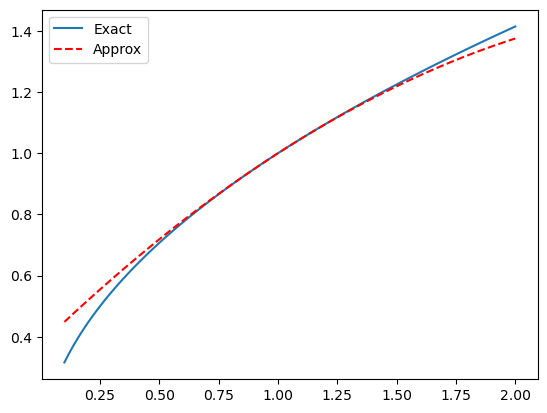

---
Task 3 - Optimization
Optimal investment (x) for best balance: 2.0
Maximum net value (return - risk): 2.62


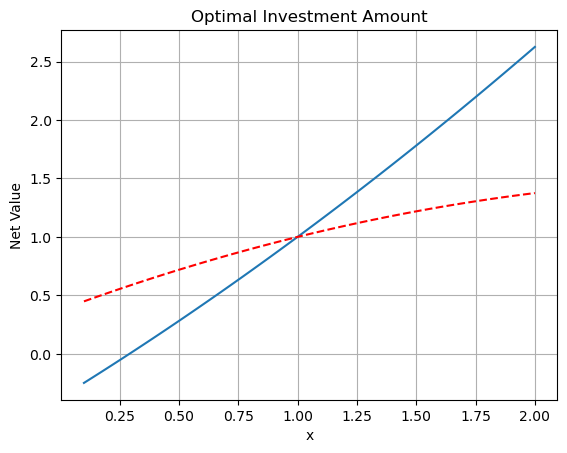

In [19]:
## Task 1
x = sp.Symbol('x', positive=True)
f = sp.sqrt(x)
f_approx = f.series(x, 0, 3).removeO()
#Showing Taylor series
print(f_approx)
# Because of formula is square root the estimation cannot start at zero, which is why its just showing as the original equation
# Changing to start at 1 yeidls an acutal est. formula.
f_approx = f.series(x, 1, 3).removeO()
print("Task 1 - Taylor Series")
print(f_approx)

## Task 2
x_values = np.linspace(0.1, 2, 100)  # 100 values
f_exact = [f.subs(x, v).evalf() for v in x_values]
f_approx = [f_approx.subs(x, v).evalf() for v in x_values]
print("Task 2 - Practical Application")
## We want to see the accuracy over time
plt.plot(x_values, f_exact, label='Exact')
plt.plot(x_values, f_approx, label= 'Approx', linestyle='--', color='red')
plt.legend()
plt.show()

## Discussion - The approximation is helpful when the investment amount is small or close to 1. You csn see in the plot below that at 
## super low numbers the taylor seires over estimates the value and as the numbers get larger, the taylor series underestimates the values.
## This method allows for a quick esimate wihtout needing to execute the full sq root calcuations. 
## In short, its pracitcal applicagtion is for fast estimates, but for bigger investments / larger decisions the actual, non estimated calculations
## are needed.


## Task 3
print('---')
print("Task 3 - Optimization")
return_vals = [2 * val for val in x_values]  # return is 2x because simplest linear return option
net_val_list = [ret - risk for ret, risk in zip(return_vals, f_approx)]

#Getting the max value from the linear return function, then the x value for that value
max_net = max(net_val_list)
optimal_index = net_val_list.index(max_net)
optimal_x = x_values[optimal_index]

### Assuming 2x is the investment function
print(f"Optimal investment (x) for best balance: {optimal_x}")
print(f"Maximum net value (return - risk): {round(max_net,2)}")

## Plottingt this
plt.plot(x_values, net_val_list)
plt.plot(x_values, f_approx, label= 'Approx', linestyle='--', color='red')
plt.xlabel("x")
plt.ylabel("Net Value")
plt.title("Optimal Investment Amount")
plt.grid(True)
plt.show()

## Discussion - To develop an optimization scenario I created a simple return function of 2x for the exercise. No formula was provided. 
## Using this return function, taylor series approximation of the risk formula was used to calculate the net value as return − risk.
## The results of this net gain set of values was plotted to get visual look at it. Beyond the plot, the maximum value of the net gain was found. 
## It was 2.62. The corresponding value for x was 2 (for the numbers that were run). 
## Overall this helps show how the approximation could help with quick decisions when exact values are harder to compute. 



### Question 3: Inventory Management

**Scenario:**  
In a manufacturing process, the demand for a product decreases as the price increases, modeled by:

$$
D(p) = 1 - p
$$

where \( p \) is the price. The cost associated with producing and selling the product is modeled as:

$$
C(p) = e^p
$$

The company wants to maximize its profit, which is the difference between revenue and cost.

---

#### Task:

1. **Taylor Series Expansion:**  
   Expand the cost function  
   $$
   C(p) = e^p
   $$ 
   into a Taylor Series around \( p = 0 \) up to the second degree.  
   Discuss why approximating the cost function might be useful in a pricing strategy.

2. **Approximating Profit:**  
   Using the Taylor Series expansion, approximate the profit function:  
   $$
   \Pi(p) = pD(p) - C(p)
   $$  
   Compare the results when using the original nonlinear cost function versus the approximated cost function.  
   What differences do you observe, and when might the approximation be sufficient?

3. **Pricing Strategy:**  
   Based on the Taylor Series approximation, suggest a pricing strategy that could maximize profit.  
   Explain how the Taylor Series approximation helps in making this decision.

---

**Submission:**  
Include your analysis in R-Markdown or Python, with:
- Taylor Series expansions
- Comparisons of the approximated and original functions
- A discussion of the implications for pricing strategy


Task 1 - Taylor Series Approx.
p**2/2 + p + 1
Task 2 - Approximating Profit
p**2/2 + p + 1
-p**2/2 + p*(1 - p) - p - 1
Max Exact Profit: -1.00000000000000
Max Approximated Profit: -1.00000000000000


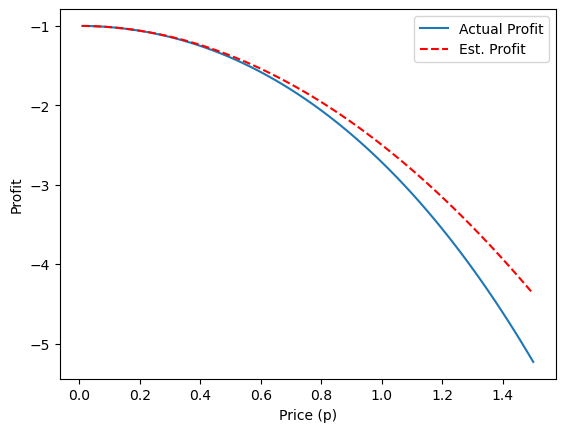

Task3 - Pricing Strategy
Best Price (p) to Maximize Approximated Profit: 0.01
Max Approximated Profit: -1.00000000000000


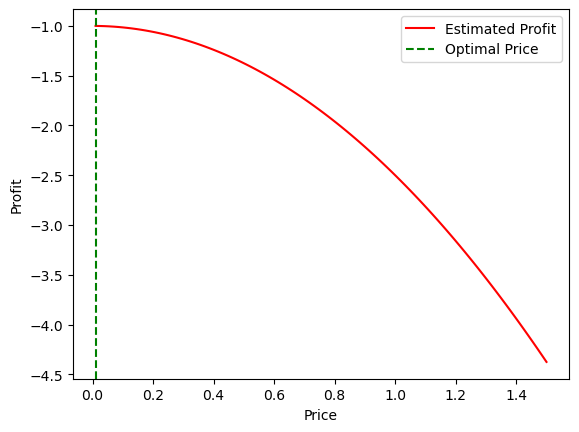

In [20]:
#Task 1 
p = sp.Symbol('p',positive=True)
C = sp.exp(p)

#Taylor Series approx. 
C_approx = C.series(p, 0, 3).removeO()
print("Task 1 - Taylor Series Approx.")
print(C_approx)

## Discussion - The simplification of the equation via the approximation using the taylor series has tremendous benefit for quickly estimating 
## the product demands and the related cost, specifcally for how items are priced. Estimating this quickly may be able to help competativeness
## and profitability.

# Task 2 
D = 1 - p               
P = p * D - C        

C_approx = C.series(p, 0, 3).removeO()
print("Task 2 - Approximating Profit")
print(C_approx)
# approximated profit

P_approx = p * (1 - p) - C_approx   
print(P_approx)

p_vals = np.linspace(0.01, 1.5, 100)
P_exact_vals = [P.subs(p, val).evalf() for val in p_vals]
P_approx_vals = [P_approx.subs(p, val).evalf() for val in p_vals]

max_exact = max(P_exact_vals)
max_approx = max(P_approx_vals)
print(f"Max Exact Profit: {round(max_exact,2)}")
print(f"Max Approximated Profit: {round(max_approx,2)}")

plt.plot(p_vals, P_exact_vals, label='Actual Profit')
plt.plot(p_vals, P_approx_vals, '--', label='Est. Profit', color='red')
plt.xlabel("Price (p)")
plt.ylabel("Profit")
plt.legend()
plt.show()

## Discussion - This estimation is good for prices on the lower end of the spectrum. As price increases, the accuracy of the approximation deminishes.
## The estimated profit overestimates when looked at in context with the actual profit.
## Also worth noting, the profit values are negative in this range, so the model isn’t showing actual profit, but instead the least loss.


# Task 3
print('Task3 - Pricing Strategy')
# getting maximum profit and it's related price using the approximated profit
max_profit = max(P_approx_vals)
optimal_index = P_approx_vals.index(max_profit)
optimal_price = p_vals[optimal_index]
print(f"Best Price (p) to Maximize Approximated Profit: {round(optimal_price,2)}")
print(f"Max Approximated Profit: {round(max_profit,2)}")

plt.plot(p_vals, P_approx_vals, color='red', label='Estimated Profit')
plt.axvline(x=optimal_price, color='green', linestyle='--', label='Optimal Price')
plt.xlabel("Price")
plt.ylabel("Profit")
plt.legend()
plt.show()

#Discussion - Using the Taylor approximation helped quickly find the price that gives the best estimated profit. 
## Even though the profit is negative, we can still use this to figure out the price that minimizes loss. 
# The approach is fast and useful for early planning or sketch decisions, but for major decisiosn we’d need to use
# the actual profit function. Lastly, the overal recommendation for this product would be to avoid it. The demand declines to quickly for any price to 
# be profitable when considering the cost. This product is a lost cause.

### Question 4: Economic Forecasting

**Scenario:**  
An economist is forecasting economic growth, which can be modeled by the logarithmic function:  
\\[
G(x) = \ln(1 + x)
\\]  
where \\( x \\) represents investment in infrastructure. The government wants to predict growth under different levels of investment.

---

#### Task:

1. **Maclaurin Series Expansion:**  
   Derive the Maclaurin Series expansion of  
   \\[
   G(x) = \ln(1 + x)
   \\]  
   up to the second degree. Explain the significance of using this approximation for small values of \\( x \\) in economic forecasting.

2. **Approximation of Growth:**  
   Use the Taylor Series to approximate the growth for small investments. Compare this approximation with the actual growth function. Discuss the accuracy of the approximation for different ranges of \\( x \\).

3. **Policy Recommendation:**  
   Using the approximation, recommend a level of investment that could achieve a target growth rate. Discuss the limitations of using Taylor Series approximations for such policy recommendations.

---

### Submission Requirements:

- Taylor Series expansions  
- Comparisons between the approximated and original functions  
- Investment recommendations based on your analysis


Task 1 - Taylor Series
-x**2/2 + x
Task 2 - Growth Approx.


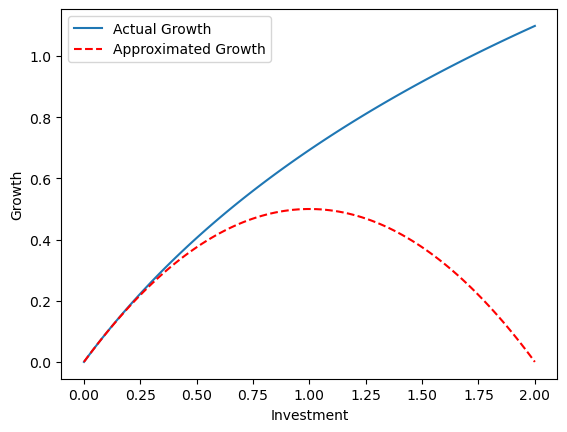

Task 3 - Policy Recommendation
Max Growth:  0.499948984797470
Est. Optimum Investment: 0.99


In [21]:
# Task 1
x = sp.Symbol('x')
G = sp.ln(1 + x)
G_approx = G.series(x, 0, 3).removeO()
print("Task 1 - Taylor Series")
print(G_approx)

# Task2
x_vals = np.linspace(0, 2, 100)
G_exact_vals = [G.subs(x, val).evalf() for val in x_vals]
G_approx_vals = [G_approx.subs(x, val).evalf() for val in x_vals]
print("Task 2 - Growth Approx.")
# Plot the exact vs approximated growth
plt.plot(x_vals, G_exact_vals, label="Actual Growth")
plt.plot(x_vals, G_approx_vals, '--', label="Approximated Growth", color='red')
plt.xlabel("Investment")
plt.ylabel("Growth")
plt.legend()
plt.show()

## Discussion - Looking at the plot below  the taylor series approximation is accurate for smaller investment values. However, once x exceeds 0.5,
## the extimated value begins to decrease while the actual investment growth continues to increase. This means the approximation begins to 
## So the approximation underestimates growth for higher values of investments. Overall good for smaller investmenrs, not good for larger.

# Task3 
print("Task 3 - Policy Recommendation")
max_growth = max(G_approx_vals)
print("Max Growth: ",max_growth)
optimal_index = G_approx_vals.index(max_growth)
optimal_x = x_vals[optimal_index]
print("Est. Optimum Investment:",round(optimal_x,2))
## Disussion - THe optimal amount of investment recommended using the growth appriximation is 0.99. Accoding to the estimate this would yiled a
## gorwth valueof 0.499. However, when compared with the actual values the growth for this level of x would be higher, so the policy recommedation 
## made using the approximation would be a concervative estimate, with the actual returns being higher.

## Problem 5 - Profit, Cost, & Pricing

---

### Question 1: Profit Maximization

**Scenario:**  
A company produces two products, A and B. The profit function for the two products is given by:

\\[
\Pi(x, y) = 30x - 2x^2 - 3xy + 24y - 4y^2
\\]

Where:  
- \( x \) is the quantity of Product A produced and sold.  
- \( y \) is the quantity of Product B produced and sold.  
- \( \Pi(x, y) \) is the profit in dollars.

---

**Task:**

1. Find all local maxima, local minima, and saddle points for the profit function $$ \Pi(x, y) $$.
2. Write your answer(s) in the form $$ (x, y, \Pi(x, y)) $$. Separate multiple points with a comma.

---

**Discussion:**  
Discuss the implications of the results for the company’s production strategy.  
Which production levels maximize profit, and what risks are associated with the saddle points?


In [22]:
#Task 1
x, y = sp.symbols('x y')
Pi = 30*x - 2*x**2 - 3*x*y + 24*y - 4*y**2
#Getting derivatives
Pi_x = sp.diff(Pi, x) 
Pi_y = sp.diff(Pi, y)

# Min and max points
points = sp.solve([Pi_x, Pi_y], (x, y), dict=True)
print("Task 1")
print(points)

# Task 2
## FIguring out the types of poitns we fount in task 1
Pi_xx = sp.diff(Pi_x, x)  
Pi_yy = sp.diff(Pi_y, y)  
Pi_xy = sp.diff(Pi_x, y) 

x_val = points[0][x]
y_val = points[0][y]

#Plugging  in the points to derivs
f_xx = Pi_xx.subs({x: x_val, y: y_val})
f_yy = Pi_yy.subs({x: x_val, y: y_val})
f_xy = Pi_xy.subs({x: x_val, y: y_val})

# discriminant calc
D = f_xx * f_yy - f_xy**2
print("Task 2")
print(f"Second derivatives at points: f_xx = {f_xx}, f_yy = {f_yy}, f_xy = {f_xy}")
print(f"D = {D}")
## Second derivative test says that f_xx is negative and D is positive, which means its maximum point.
## This means the combination of x = 168/23 and y = 6/23, the intitial poitns found, will give the highest profit.

print(f"This means that for product a and product b, the optimal production levels for maximum profit are ${round(168/23,2)} and ${round(6/23,2)}, respectively.")
## Lastly, The risks associated with saddle points are that a small change in prodiuction values can lead to a dramatic increase / decrease in the
## expected profit. THis makes them unreliable for predictions.

Task 1
[{x: 168/23, y: 6/23}]
Task 2
Second derivatives at points: f_xx = -4, f_yy = -8, f_xy = -3
D = 23
This means that for product a and product b, the optimal production levels for maximum profit are $7.3 and $0.26, respectively.


### Question 2 - Pricing Strategy

**Scenario**:  
A supermarket sells two competing brands of a product: Brand X and Brand Y. The store manager estimates that the demand for these brands depends on their prices, given by:

- Demand for Brand X: \\( D_X(x, y) = 120 - 15x + 10y \\)
- Demand for Brand Y: \\( D_Y(x, y) = 80 + 5x - 20y \\)

Where:
- \\( x \\): Price of Brand X in dollars
- \\( y \\): Price of Brand Y in dollars
- \\( D_X(x, y) \\), \\( D_Y(x, y) \\): Quantities demanded

**Task**:
1. **Revenue Function**: Find the revenue function \( R(x, y) \) for both brands combined.
2. **Optimal Pricing**: Determine the prices \( x \) and \( y \) that maximize the store’s total revenue. Are there any saddle points to consider in the pricing strategy?

**Discussion**:  
Explain the significance of the optimal pricing strategy and how it can be applied in a competitive retail environment.

In [23]:
# Task 1
x, y = sp.symbols('x y')
D_X = 120 - 15*x + 10*y
D_Y = 80 + 5*x - 20*y

# Revenue is Price x Quantity(Demand) for each
R = x * D_X + y * D_Y
R_simplified = sp.simplify(R)
print("Task 1 - Revenue Function")
print(R_simplified)

# Task 2
## Getting Derivatives
R_x = sp.diff(R, x) 
R_y = sp.diff(R, y)
points = sp.solve([R_x, R_y], (x, y), dict=True)
print("Critical Points:")
print(points)
x_val = points[0][x]
y_val = points[0][y]
#Second Deriv
R_xx = sp.diff(R_x, x)
R_yy = sp.diff(R_y, y)
R_xy = sp.diff(R_x, y)
f_xx = R_xx.subs({x: x_val, y: y_val})
f_yy = R_yy.subs({x: x_val, y: y_val})
f_xy = R_xy.subs({x: x_val, y: y_val})
#Discriminant
D = f_xx * f_yy - f_xy**2
print("Task 2 - Optimal Function")
print(f"Second derivatives at points: f_xx = {f_xx}, f_yy = {f_yy}, f_xy = {f_xy}")
print(f"D = {D}")
## Second derivative test says that f_xx is negative and D is positive, which means its maximum point.
## This means the combination of x = 80/13 and y = 56/13, the intitial poitns found, will give the highest profit.
print (f"Optimal Pricing for Brand X  is ${round(80/13,2)}.")
print (f"Optimal Pricing for Brand Y is ${round(56/13,2)}.")

Task 1 - Revenue Function
5*x*(-3*x + 2*y + 24) + 5*y*(x - 4*y + 16)
Critical Points:
[{x: 80/13, y: 56/13}]
Task 2 - Optimal Function
Second derivatives at points: f_xx = -30, f_yy = -40, f_xy = 15
D = 975
Optimal Pricing for Brand X  is $6.15.
Optimal Pricing for Brand Y is $4.31.


### Question 3 - Cost Minimization

**Scenario**:  
A manufacturing company operates two plants, one in New York and one in Chicago. The company needs to produce a total of 200 units of a product each week. The total weekly cost of production is given by:

\\[
C(x, y) = \frac{1}{8}x^2 + \frac{1}{10}y^2 + 12x + 18y + 1500
\\]

Where:
- \\( x \\): Units produced in New York
- \\( y \\): Units produced in Chicago
- \\( C(x, y) \\): Total cost in dollars

**Task**:
1. Determine how many units should be produced in each plant to minimize the total weekly cost.
2. What is the minimized total cost, and how does the distribution of production between the two plants affect overall efficiency?

**Discussion**:  
Discuss the benefits of this cost-minimization strategy and any practical considerations that might influence the allocation of production between the two plants.

In [24]:
#Task 1
x, y, λ = sp.symbols('x y λ')
C = (1/8)*x**2 + (1/10)*y**2 + 12*x + 18*y + 1500

# 200 units a week needed: 
#x + y = 200
#Lagrangian input
g = x+y - 200 # g = 0

# Lagrangian: L = C(x, y) - λ * g(x, y)
L = C - λ * g

# Take partial derivatives of L with respect to x, y, and λ
L_x = sp.diff(L, x)
L_y = sp.diff(L, y)
L_lambda = sp.diff(L, λ)

# Solve the system of equations
solutions = sp.solve((L_x, L_y, L_lambda), (x, y, λ), dict=True)
print("Task 1")
print(f"In order to minimize cost a total of {round(solutions[0][x])} should be produced in NY, and {round(solutions[0][y])} should be produced in Chicago")

#Task 2
print("Task 2")
minimized_cost = C.subs({x: solutions[0][x], y: solutions[0][y]})
print(f"Minimized total cost is ${round(minimized_cost, 2)}")

# Discussion - The cost minimization strategy shows how splitting production between New York and Chicago can reduce overall costs. 
#In this case, producing around 102 units in New York and 98 units in Chicago keeps production balanced but favors New York.
#This method gives a clear and fast way to allocate production efficiently. It also shows how important it is to consider both fixed 
#and variable costs when planning operations. Practically, costs like labor, shipping, or capacity impact costs, but this model
# gives a good foudnation for starting to minimizeA cost.


Task 1
In order to minimize cost a total of 102 should be produced in NY, and 98 should be produced in Chicago
Task 2
Minimized total cost is $6748.89


### Question 4 - Marketing Mix

**Scenario**:  
A company is launching a marketing campaign that involves spending on online ads (\( x \)) and television ads (\( y \)). The effectiveness of the campaign, measured in customer reach, is modeled by the function:

\\[
E(x, y) = 500x + 700y - 5x^2 - 10xy - 8y^2
\\]

Where:
- \\( x \\): Amount spent on online ads (in thousands of dollars)
- \\( y \\): Amount spent on television ads (in thousands of dollars)
- \\( E(x, y) \\): Estimated customer reach

**Task**:
1. Find the spending levels for online and television ads that maximize customer reach.
2. Identify any saddle points and discuss how they could affect the marketing strategy.

**Discussion**:  
Explain how the results can be used to allocate the marketing budget effectively and what the company should consider if it encounters saddle points in the optimization.

In [25]:
#Task 1
x, y = sp.symbols('x y')
E = 500*x + 700*y - 5*x**2 - 10*x*y - 8*y**2
E_x = sp.diff(E, x)
E_y = sp.diff(E, y)
points = sp.solve([E_x, E_y], (x, y), dict=True)
print("Task 1")
print("critical points:",points)

#task 2
#Seocnd deriv test
E_xx = sp.diff(E_x, x)
E_yy = sp.diff(E_y, y)
E_xy = sp.diff(E_x, y)
f_xx_val = E_xx.subs(points[0])
f_yy_val = E_yy.subs(points[0])
f_xy_val = E_xy.subs(points[0])

# Discriminant: D = f_xx * f_yy - (f_xy)^2
D = f_xx_val * f_yy_val - f_xy_val**2
print("Task 2")
print(f"Second derivatives at points: f_xx = {f_xx}, f_yy = {f_yy}, f_xy = {f_xy}")
print(f"D = {D}")

## Second derivative test says that f_xx is negative and D is positive, which means its a local maximum point.
## This means the combination of x = 50/3 and y = 100/3, the intitial poitns found, will give the highest profit.
print (f"Optimal spending for online ads (x)  is ${round(((50/3)*1000),2)}.")
print (f"Optimal spending for Tv ads (y) is ${round(((100/3)*1000),2)}.")

## Discussion - Based on the results, the company should spend about $16.67K on online ads and $33.33K on TV ads to maximize customer reach. 
## The critical point we found is a local maximum. 
## Since no saddle points were found, so the risk surrounding them is low for this model. If a saddle point was encountered, it would mean risk that
## the reach from one type of ad could for up and the other could go down. This implies the compnay would have to be cautious with small budgetary 
## shifts as such changes could lead to drastic unpredicable shifts. 


Task 1
critical points: [{x: 50/3, y: 100/3}]
Task 2
Second derivatives at points: f_xx = -30, f_yy = -40, f_xy = 15
D = 60
Optimal spending for online ads (x)  is $16666.67.
Optimal spending for Tv ads (y) is $33333.33.
